# Tarea 3, IMT2220, semestre 2025-1

Este notebook muestra la funcionalidad del algoritmo FFT proporcionado por SciPy.

Analizamos las frecuencias de una función trigonométrica que representa una base de datos con temperatura horaria.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks

Asumimos que la base de datos viene con una temperatura cada hora. Por tanto, la medida de unidad del tiempo es horas. Para testear el análisis de Fourier, generamos una serie de tiempo con un punto de muestra cada hora (sampling rate = 1) y una duración de diez días (240 horas).

In [2]:
sampling_rate = 1 # número de mediciones por hora
time_length = 24 * 10 # número de horas para generar datos

In [3]:
n_samples = sampling_rate * time_length

La frecuencia de la temperatura esperada es un día. Es decir, hay oscilaciones diarias en la temperatura. Dado que la base de datos es en horas, tenemos que definir la frecuencia como el inverso de 24 horas.

In [4]:
frequency = 1 / 24 # la frecuencia es un día, 24 horas

Generamos la temperatura horaria, donde elegimos una temperatura promedio de 20 grados con cambios de 10 grados y un error de medición Gausiano.

In [5]:
time_samples = np.linspace(0, time_length, n_samples, endpoint=False)
temperature = 20 + 10 * np.cos(2*np.pi * frequency * time_samples) + np.random.normal(0, 1, n_samples)

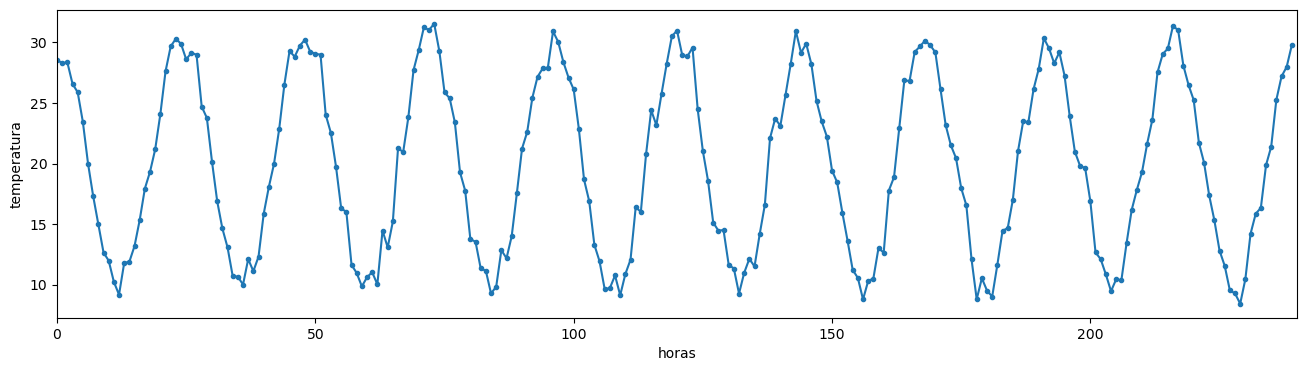

In [6]:
fig = plt.figure(figsize=(16,4))

plt.plot(time_samples, temperature, marker='.')

plt.xlim([0, time_length])

plt.xlabel('horas')
plt.ylabel('temperatura')

plt.show()

Calculamos la transformada de Fourier de la temperatura con el algoritmo Real Fast Fourier Transform (RFFT). Además, calculamos las frecuencias que corresponden a la salida de la función de SciPy.

In [7]:
temperature_fft = rfft(temperature)
freqs_fft = rfftfreq(n_samples, 1 / sampling_rate)

In [8]:
temperature_fft_scaled = np.abs(temperature_fft) / (n_samples/2) # ponderar la amplitud de cada frecuencia
freqs_fft_day = freqs_fft * 24 # cambiar la frecuencia de horas a días

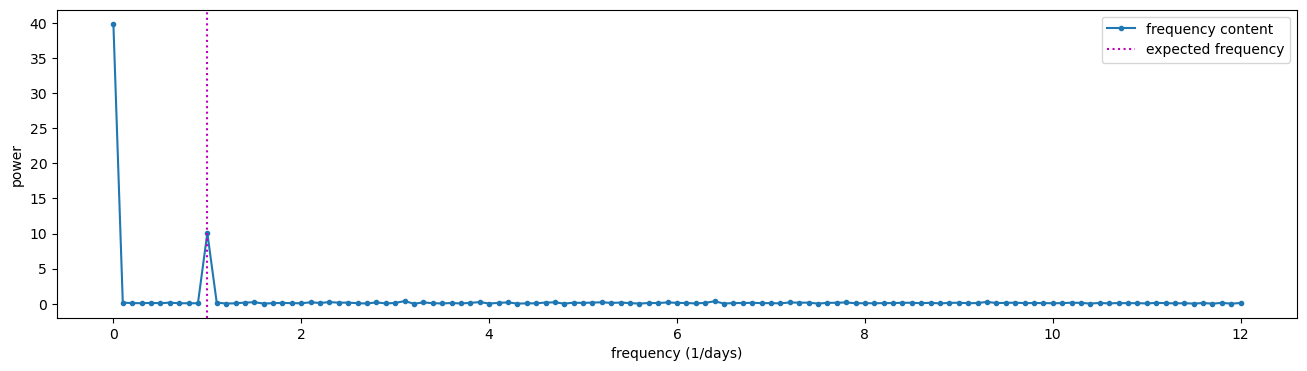

In [9]:
fig = plt.figure(figsize=(16,4))

plt.plot(freqs_fft_day, temperature_fft_scaled, marker='.', label='frequency content')
plt.axvline(frequency*24, color='m', linestyle=':', label='expected frequency')

plt.xlabel('frequency (1/days)')
plt.ylabel('power')
plt.legend()

plt.show()

Buscamos los peaks con una altura de al menos un grado Celsius.

In [10]:
peaks, _ = find_peaks(temperature_fft_scaled, height=1)

# agregamos a mano el primer índice, lo cual no es considerado un máximo local
# pero sí tiene información relevante

for p in [0] + list(peaks):
    print("Peak en ubicación", p, ":")
    print("  Frecuencia:", freqs_fft_day[p], "por día")
    print("  Amplitud:", temperature_fft_scaled[p], "grados Celsius")     

Peak en ubicación 0 :
  Frecuencia: 0.0 por día
  Amplitud: 39.86051356459336 grados Celsius
Peak en ubicación 10 :
  Frecuencia: 1.0 por día
  Amplitud: 10.070232726445761 grados Celsius


Efectivamente se puede ver un valor de diez en la frecuencia de un día, como se espera para una oscilación con amplitud 10 y periodo de 1 día. El peak para la frecuencia cero corresponde a la temperatura promedia en estos días. Su amplitud es dos veces la temperatura promedio porque es en el borde del dominio de las frecuencias.